In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from sectorizedradialprofile.calculate_radial_profile import CalculateRadialProfile
import matplotlib.pyplot as plt
from skimage import io

In [2]:
%matplotlib notebook

Load the data

In [3]:
data_file = 'data_2_circles.tif'
im = io.imread(data_file)
working_data = im[:,:,0]

Visualize data

<IPython.core.display.Javascript object>


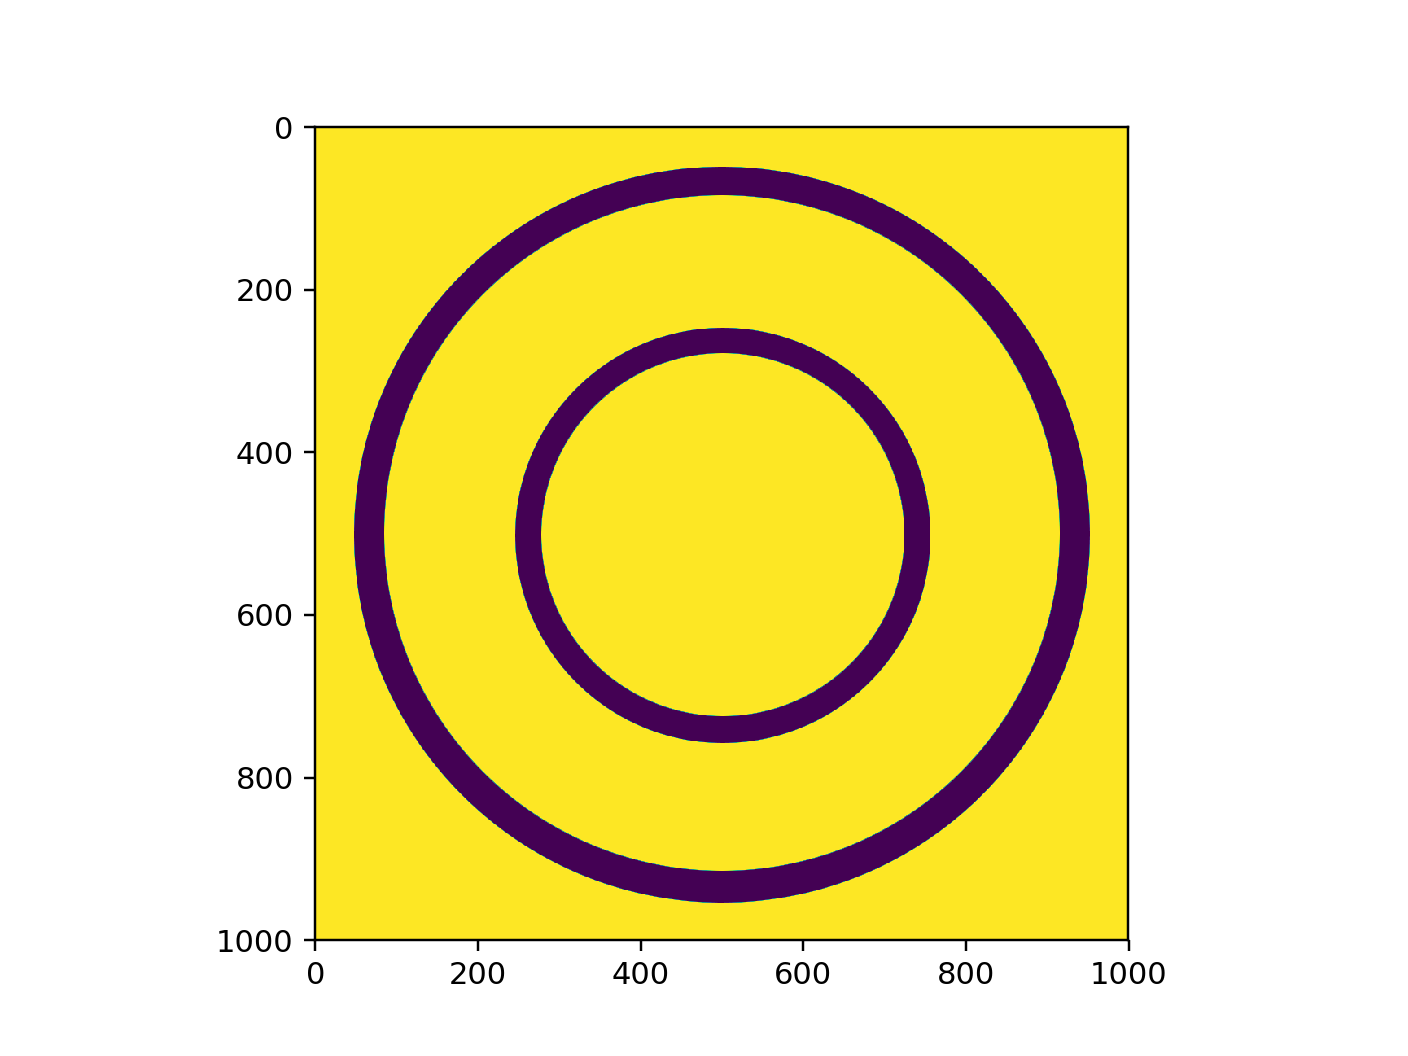

In [4]:
plt.figure(0)
plt.imshow(working_data)

Define parameters

In [5]:
center = (500, 500)  # Has to be in a form of (x0, y0)
radius = 455  # Maximum radius of your radial plot. It can be 'None' if you don't want to constrain.
angle_range = (0, 90)  # Has to be in a form of (from_angle, to_angle). It can be 'None' if you don't want to constrain.

Calculate profile

In [6]:
o_profile = CalculateRadialProfile(data=working_data)  # Initialize the class with data input
o_profile.add_params(center=center, radius=radius, angle_range=angle_range)
o_profile.calculate()

<IPython.core.display.Javascript object>


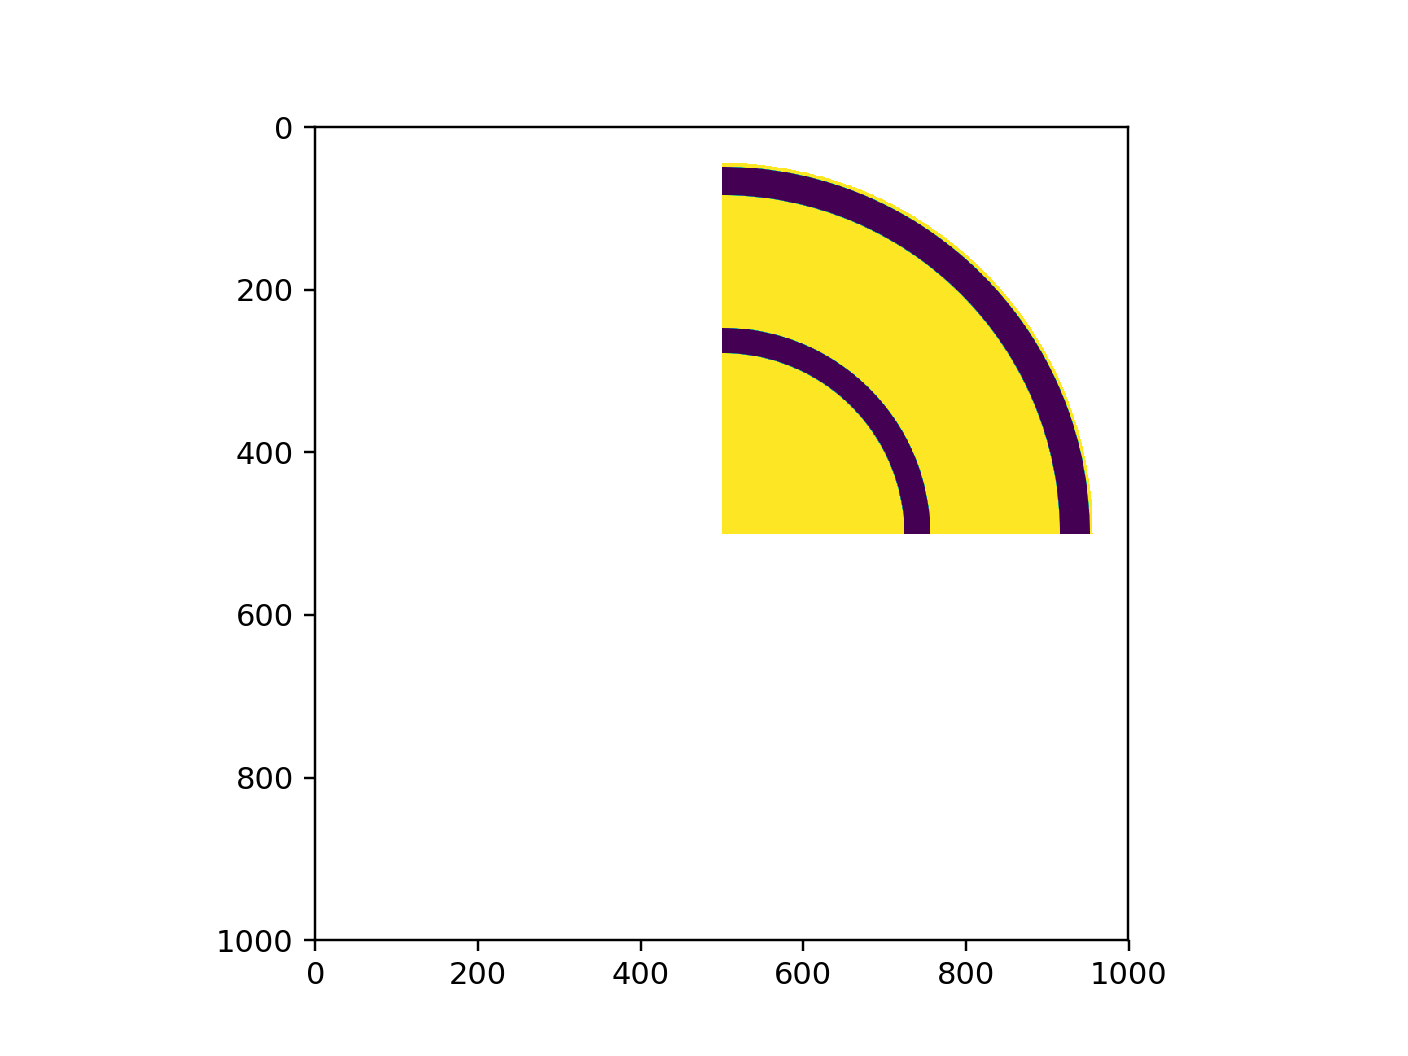

In [7]:
plt.figure(1)
plt.imshow(o_profile.working_data)

In [11]:
profile = o_profile.radial_profile
print(profile.head())
print(profile.tail())

           mean  std  sem
radius                   
0.000000  255.0  NaN  NaN
1.000000  255.0  0.0  0.0
1.414214  255.0  NaN  NaN
2.000000  255.0  0.0  0.0
2.236068  255.0  0.0  0.0
             mean  std  sem
radius                     
454.981318  255.0  0.0  0.0
454.986813  255.0  0.0  0.0
454.990110  255.0  0.0  0.0
454.991209  255.0  0.0  0.0
455.000000  255.0  0.0  0.0


Check results

<IPython.core.display.Javascript object>


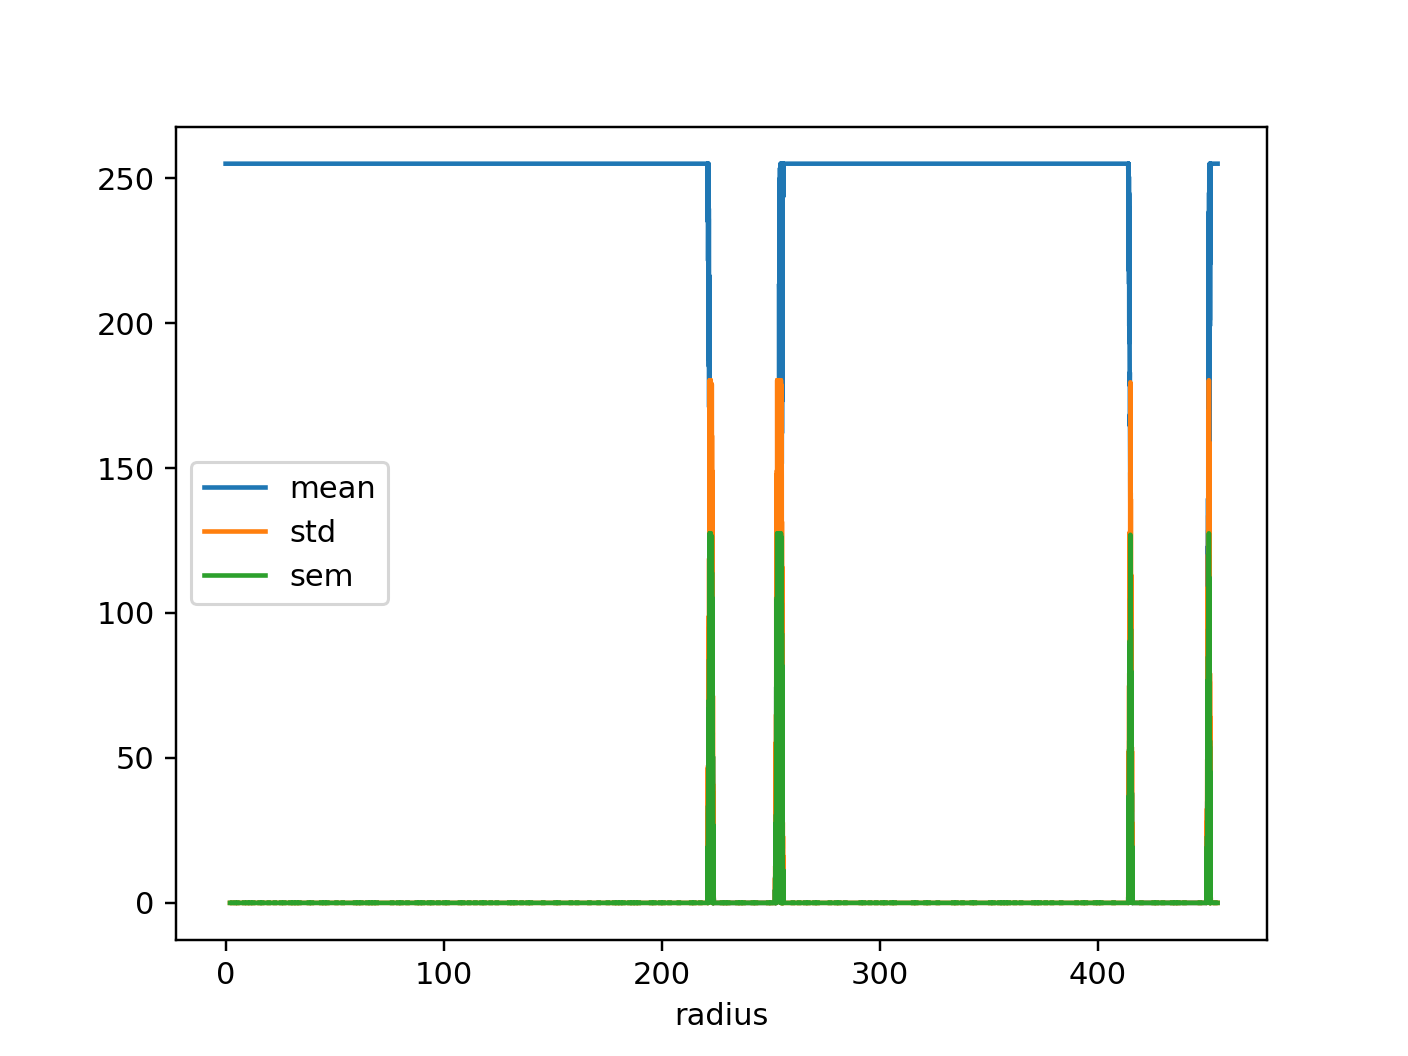

In [12]:
profile.plot()

<IPython.core.display.Javascript object>


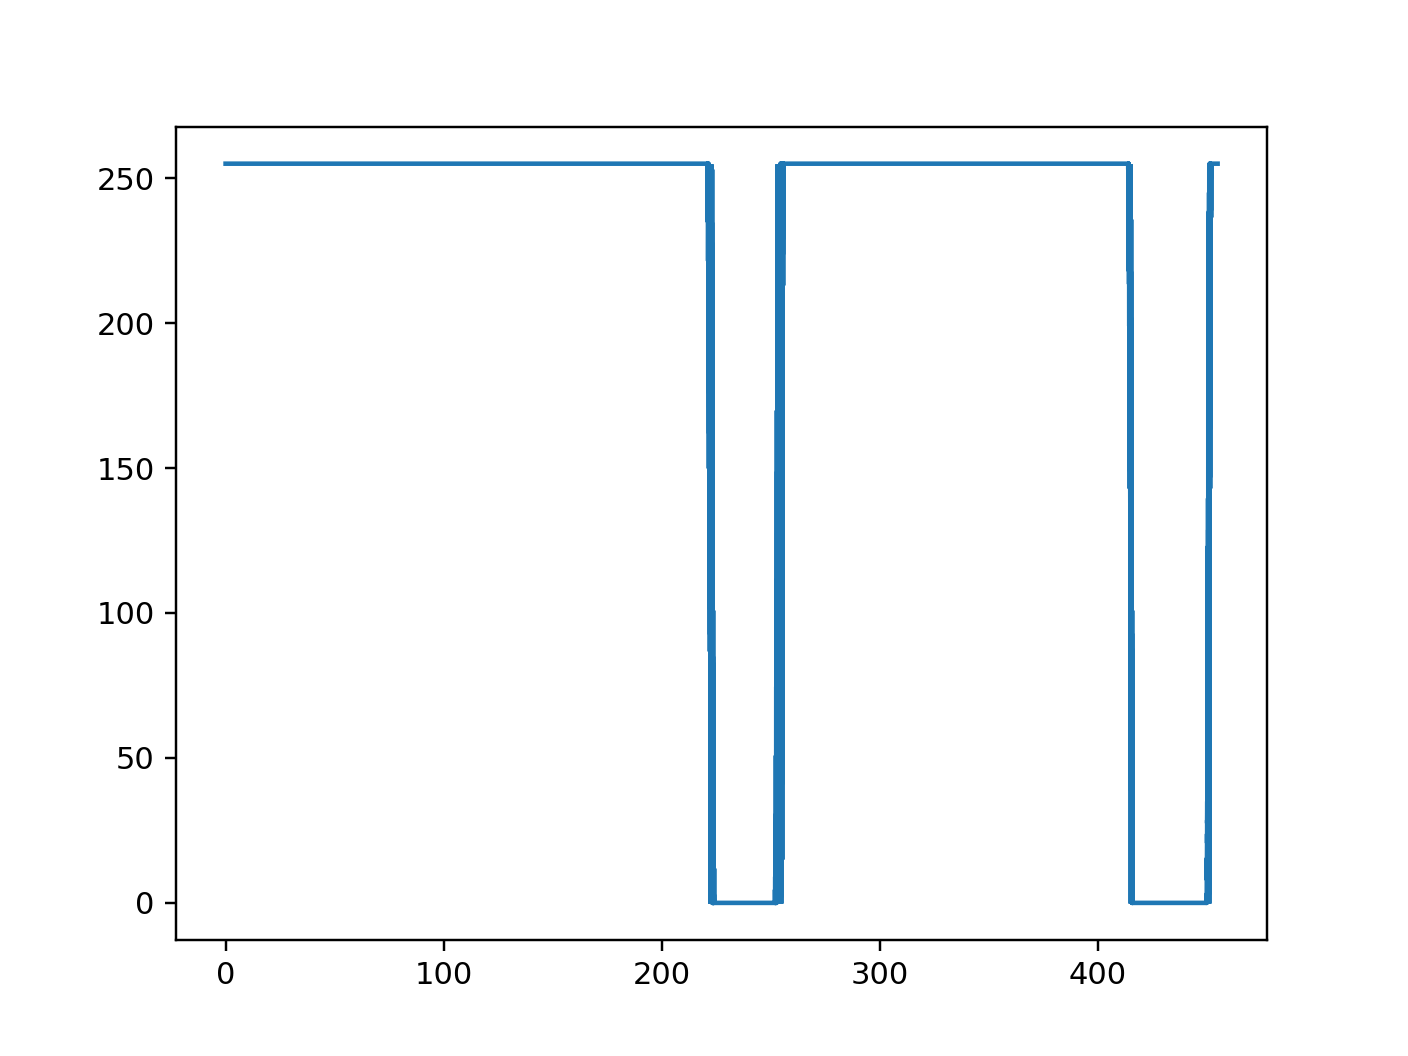

<ErrorbarContainer object of 3 artists>

In [13]:
plt.figure(3)
plt.errorbar(x=profile.index, y=profile['mean'], yerr=profile['sem'])